## Logistic Regression

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.metrics import classification_report, confusion_matrix


from sklearn.model_selection import KFold, cross_val_score, train_test_split
import optuna
import warnings
warnings.filterwarnings('ignore')

# prepare the data
X, y = load_iris(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)
RANDOM_SEED = 42

#normalize train and then test data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit(X_test)

def tune(objective):
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=10)

    params = study.best_params
    best_score = study.best_value
    print(f"Best score: {best_score}\n")
    print(f"Optimized parameters: {params}\n")
    return params



def logistic_regression_objective(trial):
    
    # 5-fold CV
    kfolds = KFold(n_splits=5, shuffle=True, random_state=RANDOM_SEED)# Define the helper function so that it can be reused

    _l1_ratio = trial.suggest_float("l1_ratio", 0.1, 1)
    _c = trial.suggest_float("C", 0.1, 20)
    logistic = LogisticRegression(l1_ratio=_l1_ratio, C = _c, random_state=RANDOM_SEED)

    scores = cross_val_score(
        logistic, X_train, y_train, cv=kfolds,
        scoring="f1_weighted"
    )
    return scores.mean()


logistic_regression_params = tune(logistic_regression_objective)
lr = LogisticRegression(**logistic_regression_params, random_state=RANDOM_SEED)

lr.fit(X_train, y_train)
print(lr.coef_)

[I 2022-08-23 22:21:49,438] A new study created in memory with name: no-name-348db158-881c-421f-8f13-7cbbf6b72b05
[I 2022-08-23 22:21:54,444] Trial 0 finished with value: 0.8739917811656943 and parameters: {'l1_ratio': 0.9555752123403306, 'C': 4.153980029914206}. Best is trial 0 with value: 0.8739917811656943.
[I 2022-08-23 22:21:54,456] Trial 1 finished with value: 0.8921744584814985 and parameters: {'l1_ratio': 0.7248176076686714, 'C': 6.331552600914713}. Best is trial 1 with value: 0.8921744584814985.
[I 2022-08-23 22:21:54,468] Trial 2 finished with value: 0.9009908836022713 and parameters: {'l1_ratio': 0.5976945688508821, 'C': 7.985662327817705}. Best is trial 2 with value: 0.9009908836022713.
[I 2022-08-23 22:21:54,482] Trial 3 finished with value: 0.9009908836022713 and parameters: {'l1_ratio': 0.27107593383239775, 'C': 11.394344435712025}. Best is trial 2 with value: 0.9009908836022713.
[I 2022-08-23 22:21:54,498] Trial 4 finished with value: 0.9009908836022713 and parameters: 

Best score: 0.9103199801947952

Optimized parameters: {'l1_ratio': 0.24297766139307075, 'C': 14.306263607615364}

[[-2.51836335  4.86982438 -5.86527612 -5.85652154]
 [ 0.42044507 -5.81324264  2.71357122 -2.91738535]
 [-0.00941598 -2.43365915  6.19150246  9.11896615]]


In [32]:
data = load_iris()
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [22]:
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [11]:
rf_params

{'n_estimators': 132,
 'max_depth': 9,
 'min_samples_split': 9,
 'min_samples_leaf': 2,
 'max_features': 3}

In [34]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import KFold, cross_val_score, train_test_split
import optuna
import warnings
warnings.filterwarnings('ignore')

# prepare the data
iris = load_iris()
X, y = pd.DataFrame(iris.data, columns = iris.feature_names), iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)
RANDOM_SEED = 42


def tune(objective):
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=10)

    params = study.best_params
    best_score = study.best_value
    print(f"Best score: {best_score}\n")
    print(f"Optimized parameters: {params}\n")
    return params



def random_forest_objective(trial):
    
    # 5-fold CV
    kfolds = KFold(n_splits=5, shuffle=True, random_state=RANDOM_SEED)# Define the helper function so that it can be reused

    _n_estimators = trial.suggest_int("n_estimators", 50, 200)
    _max_depth = trial.suggest_int("max_depth", 5, 20)
    _min_samp_split = trial.suggest_int("min_samples_split", 2, 10)
    _min_samples_leaf = trial.suggest_int("min_samples_leaf", 2, 10)
    _max_features = trial.suggest_int("max_features", 1, 4)
    
    rf = RandomForestClassifier(
        max_depth=_max_depth,
        min_samples_split=_min_samp_split,
        min_samples_leaf=_min_samples_leaf,
        max_features=_max_features,
        n_estimators=_n_estimators,
        n_jobs=-1,
        random_state=RANDOM_SEED,
    )

    scores = cross_val_score(
        rf, X_train, y_train, cv=kfolds,
        scoring="f1_weighted"
    )
    return scores.mean()


rf_params = tune(random_forest_objective)
rf = RandomForestClassifier(**rf_params, random_state=RANDOM_SEED)

rf.fit(X_train, y_train)

[I 2022-08-25 09:03:00,765] A new study created in memory with name: no-name-d69cb89f-f596-4099-a164-17b2e43da2e5
[I 2022-08-25 09:03:04,199] Trial 0 finished with value: 0.9368921444015669 and parameters: {'n_estimators': 151, 'max_depth': 19, 'min_samples_split': 9, 'min_samples_leaf': 7, 'max_features': 3}. Best is trial 0 with value: 0.9368921444015669.
[I 2022-08-25 09:03:05,304] Trial 1 finished with value: 0.9368921444015669 and parameters: {'n_estimators': 92, 'max_depth': 11, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 3}. Best is trial 0 with value: 0.9368921444015669.
[I 2022-08-25 09:03:06,529] Trial 2 finished with value: 0.9549916919128792 and parameters: {'n_estimators': 125, 'max_depth': 6, 'min_samples_split': 4, 'min_samples_leaf': 6, 'max_features': 1}. Best is trial 2 with value: 0.9549916919128792.
[I 2022-08-25 09:03:07,518] Trial 3 finished with value: 0.9368921444015669 and parameters: {'n_estimators': 57, 'max_depth': 19, 'min_samples_split':

Best score: 0.9549916919128792

Optimized parameters: {'n_estimators': 125, 'max_depth': 6, 'min_samples_split': 4, 'min_samples_leaf': 6, 'max_features': 1}



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=6, max_features=1, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=125,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [35]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

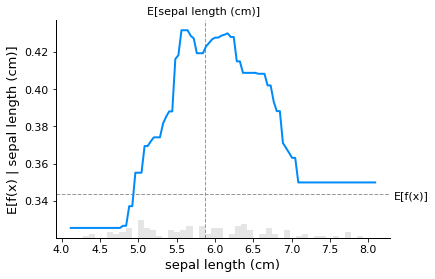

In [38]:
import shap
def model_proba(x):
    return rf.predict_proba(x)[:,1]
def model_log_odds(x):
    p = rf.predict_log_proba(x)
    return p[:,1] - p[:,0]

# make a standard partial dependence plot
sample_ind = 18
fig,ax = shap.partial_dependence_plot(
    'sepal length (cm)', model_proba, X_train, model_expected_value=True,
    feature_expected_value=True, show=False, ice=False
)

In [40]:
# compute the SHAP values for the linear model
background = shap.maskers.Independent(X, max_samples=100)
explainer = shap.Explainer(model_proba, background)
shap_values = explainer(X[:1000])

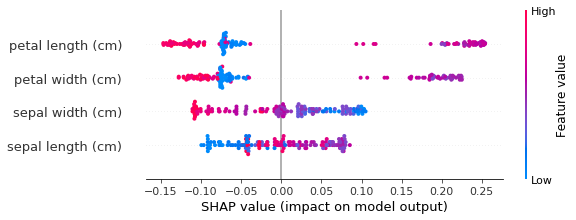

In [42]:
shap.plots.beeswarm(shap_values)

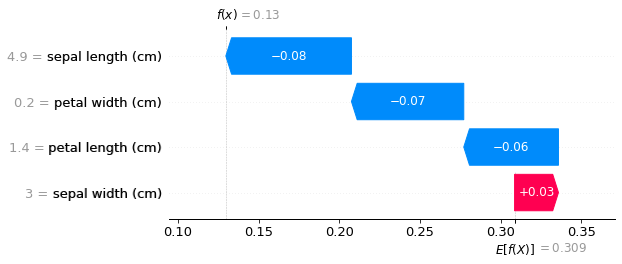

In [43]:
shap.plots.waterfall(shap_values[1])